In [1]:
import tskit
import msprime
import numpy as np
import tsutil
from timeit import default_timer as timer
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
def get_msprime_mig_example(Ne, sample_size):
    M = [[0.0, 0.1], [0.1, 0.0]]
    population_configurations = [
        msprime.PopulationConfiguration(sample_size=sample_size),
        msprime.PopulationConfiguration(sample_size=sample_size),
    ]
    ts = msprime.simulate(
        Ne=Ne,
        population_configurations=population_configurations,
        migration_matrix=M,
        length=50e6,
        recombination_rate=1e-8,
        mutation_rate=1e-8,
        record_migrations=True
    )
    return ts

In [3]:
ts = get_msprime_mig_example(1, 1000000)
tables = ts.tables
all_nodes = np.arange(0, ts.num_nodes)
subset_num = np.logspace(1,5, num=10).astype('int32')

In [4]:
ctimes = []
pytimes = []
for n in subset_num:
    nodes = np.random.choice(all_nodes, n, replace=False)
    sub1 = tables.copy()
    sub2 = tables.copy()
    t1 = timer()
    sub1.subset_nodes(nodes)
    t2 = timer()
    sub2.subset(nodes)
    t3 = timer()
    ctimes.append(t2-t1)
    pytimes.append(t3-t2)

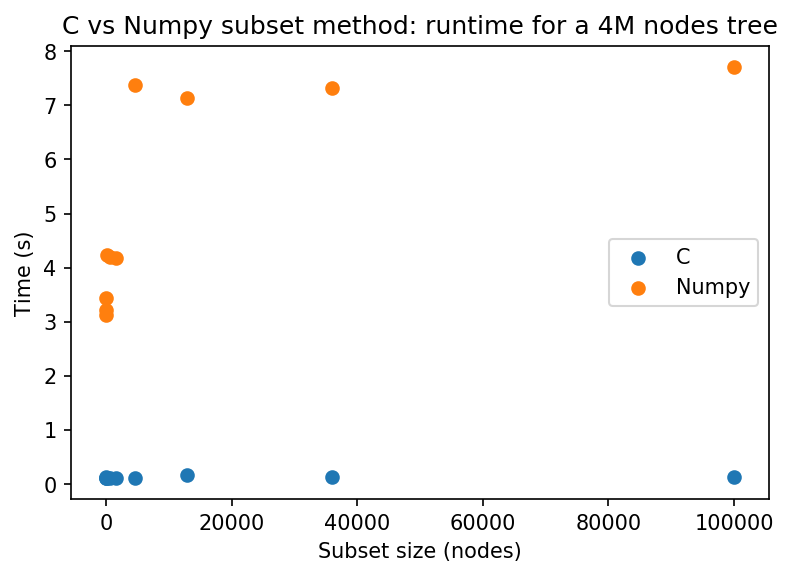

In [5]:
plt.scatter(subset_num, ctimes, label="C")
plt.scatter(subset_num, pytimes, label="Numpy")
plt.title("C vs Numpy subset method: runtime for a 4M nodes tree")
plt.xlabel("Subset size (nodes)")
plt.ylabel("Time (s)")
plt.legend()

In [6]:
ctimes2 = []
pytimes2 = []
sample_sizes = np.logspace(2,6, num=10).astype('int32')
tree_size = []
nodes = np.arange(0, 40, dtype='int32')
for s in sample_sizes:
    ts = get_msprime_mig_example(1, s)
    tree_size.append(ts.num_nodes)
    tables = ts.tables
    sub1 = tables.copy()
    sub2 = tables.copy()
    t1 = timer()
    sub1.subset_nodes(nodes)
    t2 = timer()
    sub2.subset(nodes)
    t3 = timer()
    ctimes2.append(t2-t1)
    pytimes2.append(t3-t2)

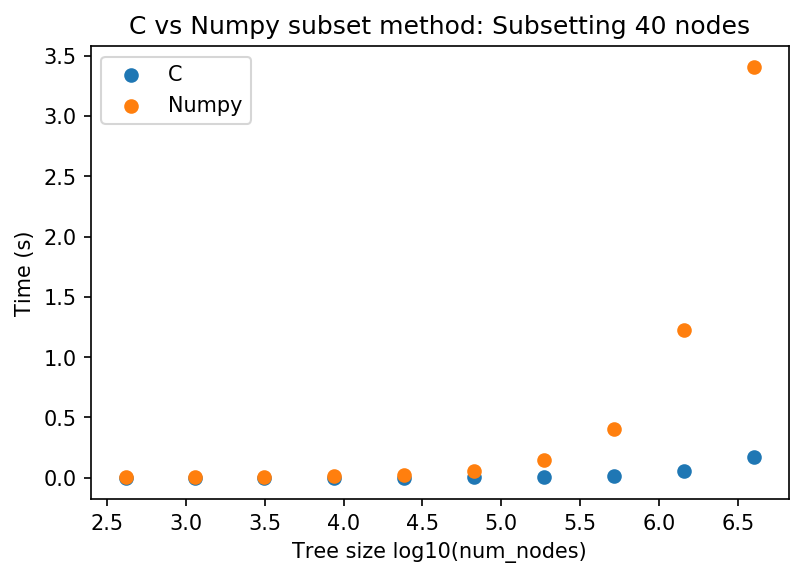

In [7]:
plt.scatter(np.log10(tree_size), ctimes2, label="C")
plt.scatter(np.log10(tree_size), pytimes2, label="Numpy")
plt.title("C vs Numpy subset method: Subsetting 40 nodes")
plt.xlabel("Tree size log10(num_nodes)")
plt.ylabel("Time (s)")
plt.legend()